In [45]:
import pandas as pd
import numpy as np
#import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data_folder = 'Data/'

In [ ]:
train = pd.read_excel(data_folder + 'train.xlsx')

In [34]:
data_cols = list(set(train.columns) - set(['lith', 'goal', 'well id']))

In [30]:
wells = train['well id'].unique()
train_well, valid_well = train_test_split(wells, test_size = 0.2, random_state = 42)

In [41]:
scaler = StandardScaler()
scaler = scaler.fit(train[data_cols])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFD6387438>,
      dtype=object)

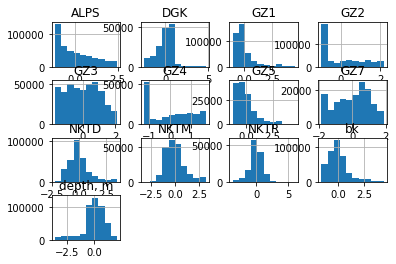

In [54]:
mda = pd.DataFrame(scaler.transform(train[data_cols]), columns = data_cols)
mda.hist()

In [ ]:
data = {}
labels = {}
for well in wells:
    data[wel] = train[train['well id'] == well][data_cols]
    data[wel] = 